#MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)

Importing the Dependecies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.dataset

In [2]:
(x_train,Y_train),(x_test,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
#shape of the numpy array
print(x_train.shape,Y_train.shape,x_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images
test data = 10,000 images

image dimesion --> 28 X28

GrayScale image --> 1 channel

In [5]:
#Print the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape)

(28, 28)


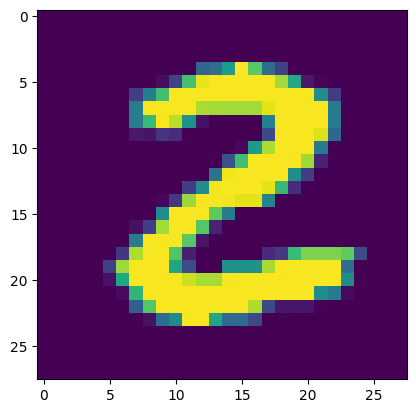

2


In [7]:
#displaying the image
plt.imshow(x_train[25])
plt.show()
#print the corresponding label
print(Y_train[25])

Image lables

In [8]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [9]:
#unique values in Y_train
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can also apply One Hot Encoding


all the images have the same dimesions in the datset , if not we have to resize the images to the common dimesions


In [10]:
# scaling the values
x_train = x_train/255
x_test = x_test/255

In [11]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the nueral network

In [12]:
# setting up the layers of the Nueral network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),# we have 28 rows 28 columns we can feed into this format we have to feed into one dimensional array
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#compiling the nueral newtwork
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8520 - loss: 0.5213
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9562 - loss: 0.1504
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9671 - loss: 0.1074
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9737 - loss: 0.0840
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9788 - loss: 0.0686
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9830 - loss: 0.0572
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0475
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0404
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9884 - loss: 0.0370
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0314


In [21]:
print(history.history['accuracy'])

[0.9139666557312012, 0.9593499898910522, 0.9697333574295044, 0.9757333397865295, 0.9798333048820496, 0.9837499856948853, 0.9863666892051697, 0.9883333444595337, 0.9888166785240173, 0.9901666641235352]


Training data the accurracy is : 99.04 %


In [23]:
loss,accuracy = model.evaluate(x_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9675 - loss: 0.1281


Test data accurrracy is 96.75 %

In [25]:
print(x_test.shape)

(10000, 28, 28)


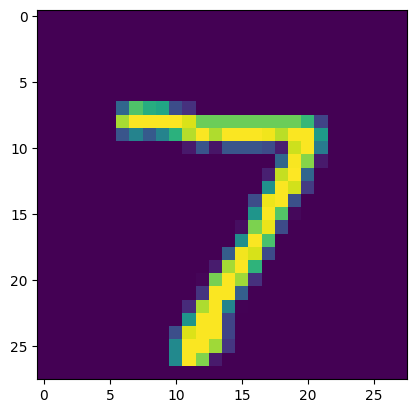

In [27]:
# first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [28]:
print(Y_test[0])

7


In [30]:
Y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [33]:
print(Y_pred.shape)

(10000, 10)


In [34]:
def help(a):
  maxi = 0
  index =0
  for i in range(0,len(a)):
    if maxi < a[i]:
      maxi = a[i]
      index = i
  return index

In [35]:
print(help(Y_pred[0]))

7


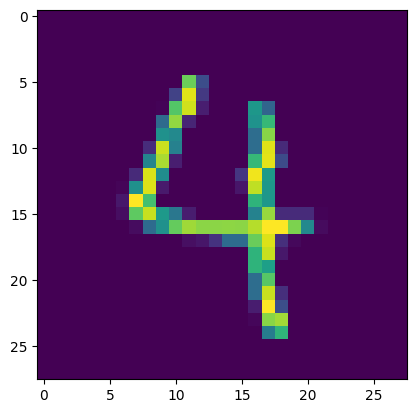

In [36]:
plt.imshow(x_test[24])
plt.show()

In [37]:
print(help(Y_pred[24]))

4


model.predict() gives the prediction probability to class label

In [38]:
#converting the prediction probabilities to class label
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [41]:
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [45]:
print(Y_test)

[7 2 1 ... 4 5 6]


In [44]:
np.corrcoef(Y_pred_labels,Y_test)

array([[1.        , 0.96523288],
       [0.96523288, 1.        ]])

Confusion Matrix

In [46]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [47]:
print(conf_mat)

tf.Tensor(
[[ 951    1    2    2    0    3    2    2    2   15]
 [   0 1118    2    7    0    1    3    1    3    0]
 [   6    0  996    8    3    0    2   11    5    1]
 [   1    0    6  981    0    6    0    7    3    6]
 [   1    0    1    1  953    0    5    8    0   13]
 [   3    0    0   16    1  859    3    0    5    5]
 [   5    1    1    1    5    6  936    0    3    0]
 [   1    1    2    4    1    1    0 1011    1    6]
 [   3    0    5   14    5   13    0    4  924    6]
 [   2    2    0    4    9    4    1    4    2  981]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

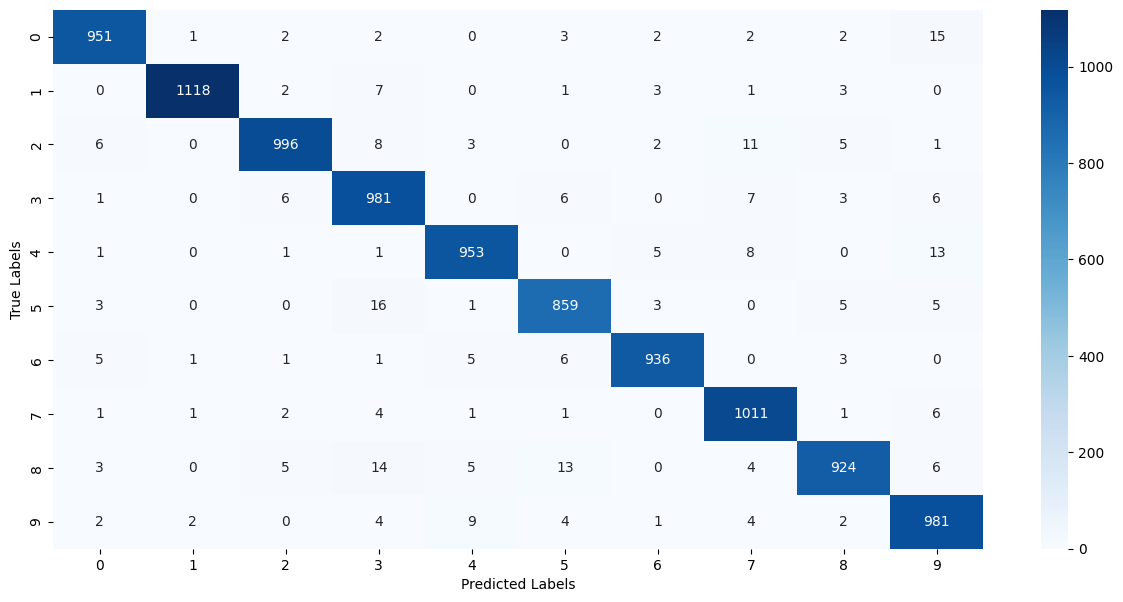

In [50]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [51]:
input_image_path = '/content/MNIST_digit.png'
input_image =cv2.imread(input_image_path)


In [52]:
type(input_image)

numpy.ndarray

In [53]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


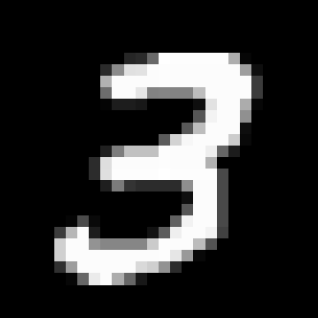

In [54]:
cv2_imshow(input_image)

In [55]:
input_image.shape

(318, 318, 3)

In [60]:
input_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

In [61]:
input_image.shape

(318, 318)

In [62]:
input_image = cv2.resize(input_image,(28,28))

In [66]:
input_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  43, 139, 224, 226,
        252, 253, 252, 252, 252, 252, 252, 252, 158,  14,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 178, 252, 252, 252,
        252, 253, 252, 252, 252, 252, 252, 252, 252,  59,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 109, 252, 252, 230,
        131, 133, 131, 131, 189, 252, 252, 252, 252,  59,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  29,  29,  24,
          0,   0,   0,   0,  14, 226, 252, 252, 172,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  85, 243, 252, 252, 144,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  88, 189, 252, 252, 252,  14,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  91, 211, 247, 252, 252, 252, 204,   9,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 125, 193, 193,
        193, 253, 252, 252, 252, 238, 102,  28,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  44, 222, 252, 252, 252,
        252, 253, 252, 252, 252, 177,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  44, 223, 253, 253, 253,
        253, 255, 253, 253, 253, 253,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 123,  52,  44,
         44,  44,  44, 143, 252, 252,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  15, 252, 252,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  86, 252, 252,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   5,  75,   9,   0,   0,   0,   0,
          0,   0,  97, 242, 252, 252,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  60, 183, 252,  29,   0,   0,   0,   0,
         18,  92, 239, 252, 252, 243,  65,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 208, 252, 252, 147, 134, 134, 134, 134,
        203, 253, 252, 252, 188,  83,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 208, 252, 252, 252, 252, 252, 252, 252,
        252, 253, 230, 153,   8,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  48, 157, 252, 252, 252, 252, 252, 217,
        207, 146,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [67]:
cv2_imshow(input_image)

In [69]:
input_image = input_image/255

In [71]:
input_image = np.reshape(input_image,(1,28,28))

In [77]:
input_prediction = model.predict(input_image)
print(help(input_prediction[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3


#Predict System


In [78]:
def predict_digit(image_path):
  """
  Predicts the digit in a handwritten image.

  Args:
    image_path (str): The path to the image file.

  Returns:
    int: The predicted digit.
  """
  input_image = cv2.imread(image_path)
  grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
  input_image_resize = cv2.resize(grayscale, (28, 28))
  input_image_resize = input_image_resize/255
  image_reshaped = np.reshape(input_image_resize, [1,28,28])
  input_prediction = model.predict(image_reshaped)
  input_pred_label = np.argmax(input_prediction)
  return input_pred_label

# Example usage:
# input_image_path = input('Path of the image to be predicted: ')
# predicted_digit = predict_digit(input_image_path)
# print('The Handwritten Digit is recognised as ', predicted_digit)

In [79]:
inpuy_image_path = '/content/MNIST_digit.png'
predicted_digit = predict_digit(inpuy_image_path)
print('The Handwritten Digit is recognised as ', predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The Handwritten Digit is recognised as  3
